In [2060]:
#"The expectations of life depend upon diligence; the mechanic that would perfect his work must first sharpen his tools."
#- Confucius

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost as xgb

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# Cusory Inspection

Notes about Data: 

Administrative: 
- This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration:
- This is the amount of time spent in this category of pages.

Informational:
- This is the number of pages of this type (informational) that the user visited.

Informational_Duration: 
- This is the amount of time spent in this category of pages.

ProductRelated:
- This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration:
- This is the amount of time spent in this category of pages.

BounceRates:
- The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates:
- The percentage of pageviews on the website that end at that specific page.

PageValues:
- The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay:
- This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in

In [2061]:
#Examining Data Frame Categories
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [2062]:
#Examining the Data Frame Numerically
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [2063]:
df.info()

#Exploring Dataframe DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [2064]:
df.corr()
#Pointing out Correlations that may help inform Business Problem's Solution
#Observations:

#Revenues related to PageValues = 49%
#Revenues related to ProductRelated_Duration = 15%
#Revenues related to Informational = 9.5%

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [2065]:
df.isna().sum()
#Checking for cleaning within Dataset

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

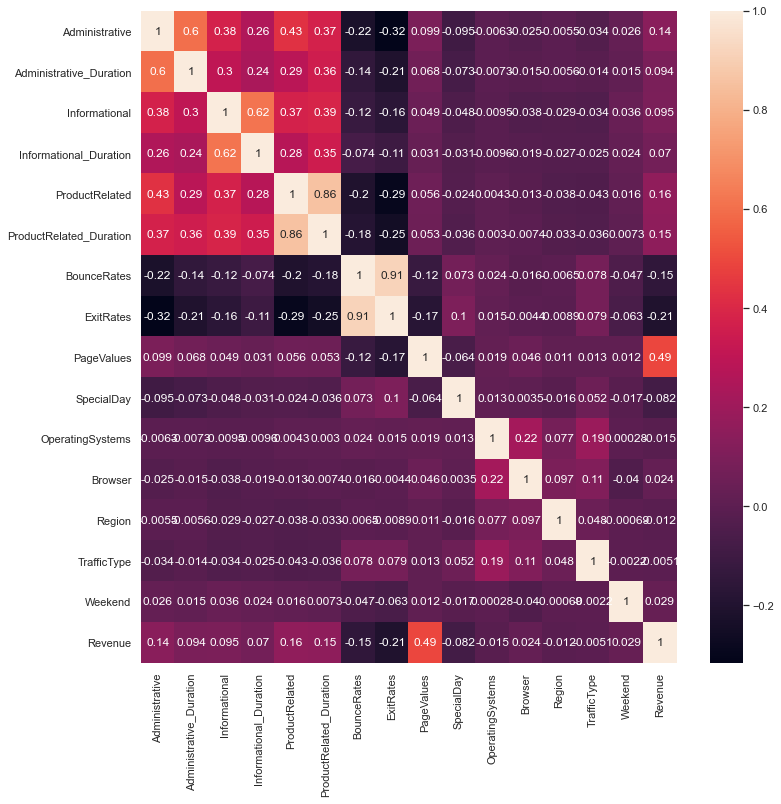

In [2066]:
sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(df.corr(), annot=True);

#Re-Examining Correlations

In [2067]:
#Exploring Month Columns
#Noted missing 2 months, January and April
#Nothing noted in CSV Source
df['Month'].value_counts(normalize=True)

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

In [2068]:
#Examining Visitor Types
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [2069]:
#Examining Week/Weeekend
df['Weekend'].value_counts(normalize=True)

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

In [2070]:
#Examining how many hit target (Revenue - True)
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [2071]:
#Exploring Relationship between Bouncerates 
df['Informational'].corr(df['BounceRates'])

-0.11611361638719088

In [2072]:
#Observation: The more likely some one is too bounce the more likely they are too leave overall
df['BounceRates'].corr(df['ExitRates'])

0.9130043961815218

In [2073]:
df['ProductRelated'].corr(df['Revenue'])

0.15853798428087468

In [2074]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [2075]:
df['ExitRates'].corr(df['ProductRelated'])

-0.2925262831135806

In [2076]:
#Observation: The product related page is the most important in detering people from exiting AKA converting to revenue
df['ProductRelated'].corr(df['ExitRates'])

-0.2925262831135806

# Pipeline Part 1: Cleaning

In [2077]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [2078]:
#Creating X and y aswell as splitting data
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2079]:
#Creating two functions to pass into pipeline

def grab_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

def drop_colum(df):
    return df.drop(columns =['Administrative', 'Administrative_Duration'])

In [2080]:
#Prepping for pipeline
GrabNumeric = FunctionTransformer(grab_numeric)
DropAdmin = FunctionTransformer(drop_colum)

In [2081]:
# Columns to feed to column transformer
num_cols = [ 'Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
cat_cols = ['VisitorType', 'Weekend', 'Month']

In [2082]:
#The basic pipeline
pipe = Pipeline(steps=[('num', GrabNumeric), 
                       ('ss', StandardScaler())])

In [2083]:
#Steps to institate on aspects of the pipeline
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [2084]:
#Passes information through the pipeline

CT = ColumnTransformer(transformers=[('DropAdmin', DropAdmin, ['Administrative', 'Administrative_Duration']),
                                      ('subpipe_num', subpipe_num, num_cols),
                                         ('subpipe_cat', subpipe_cat, cat_cols)],
                           remainder='passthrough')

In [2085]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10385,7,154.000000,3,248.166667,34,886.479167,0.000000,0.005128,77.801588,0.0,Dec,2,2,1,2,New_Visitor,False
8823,0,0.000000,0,0.000000,4,53.625000,0.000000,0.050000,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,False
5298,0,0.000000,0,0.000000,2,121.000000,0.000000,0.050000,0.000000,0.0,May,3,2,1,3,Returning_Visitor,False
10187,0,0.000000,2,21.000000,17,190.708333,0.022222,0.039259,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
11018,0,0.000000,0,0.000000,11,146.500000,0.018182,0.018182,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.000000,25,732.344872,0.000000,0.015676,0.000000,0.0,Nov,3,2,1,2,Returning_Visitor,False
5191,0,0.000000,0,0.000000,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True
5390,0,0.000000,0,0.000000,3,189.000000,0.000000,0.066667,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
860,0,0.000000,0,0.000000,13,305.000000,0.000000,0.016667,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False


In [2086]:
DropAdmin.fit(X_train)
DropAdmin.transform(X_train)

,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10385,3,248.166667,34,886.479167,0.000000,0.005128,77.801588,0.0,Dec,2,2,1,2,New_Visitor,False
8823,0,0.000000,4,53.625000,0.000000,0.050000,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,False
5298,0,0.000000,2,121.000000,0.000000,0.050000,0.000000,0.0,May,3,2,1,3,Returning_Visitor,False
10187,2,21.000000,17,190.708333,0.022222,0.039259,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
11018,0,0.000000,11,146.500000,0.018182,0.018182,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0.000000,25,732.344872,0.000000,0.015676,0.000000,0.0,Nov,3,2,1,2,Returning_Visitor,False
5191,0,0.000000,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True
5390,0,0.000000,3,189.000000,0.000000,0.066667,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
860,0,0.000000,13,305.000000,0.000000,0.016667,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False


In [2087]:
#Sanity Check
CT.fit(X_train)
CT.transform(X_train).shape
#10 months, 3 columns for vistitor type, 2 columns for weekend

(9247, 27)

In [2088]:
#Sanity Check
CT.transform(X_test).shape
#Consistent Column numbers

(3083, 27)

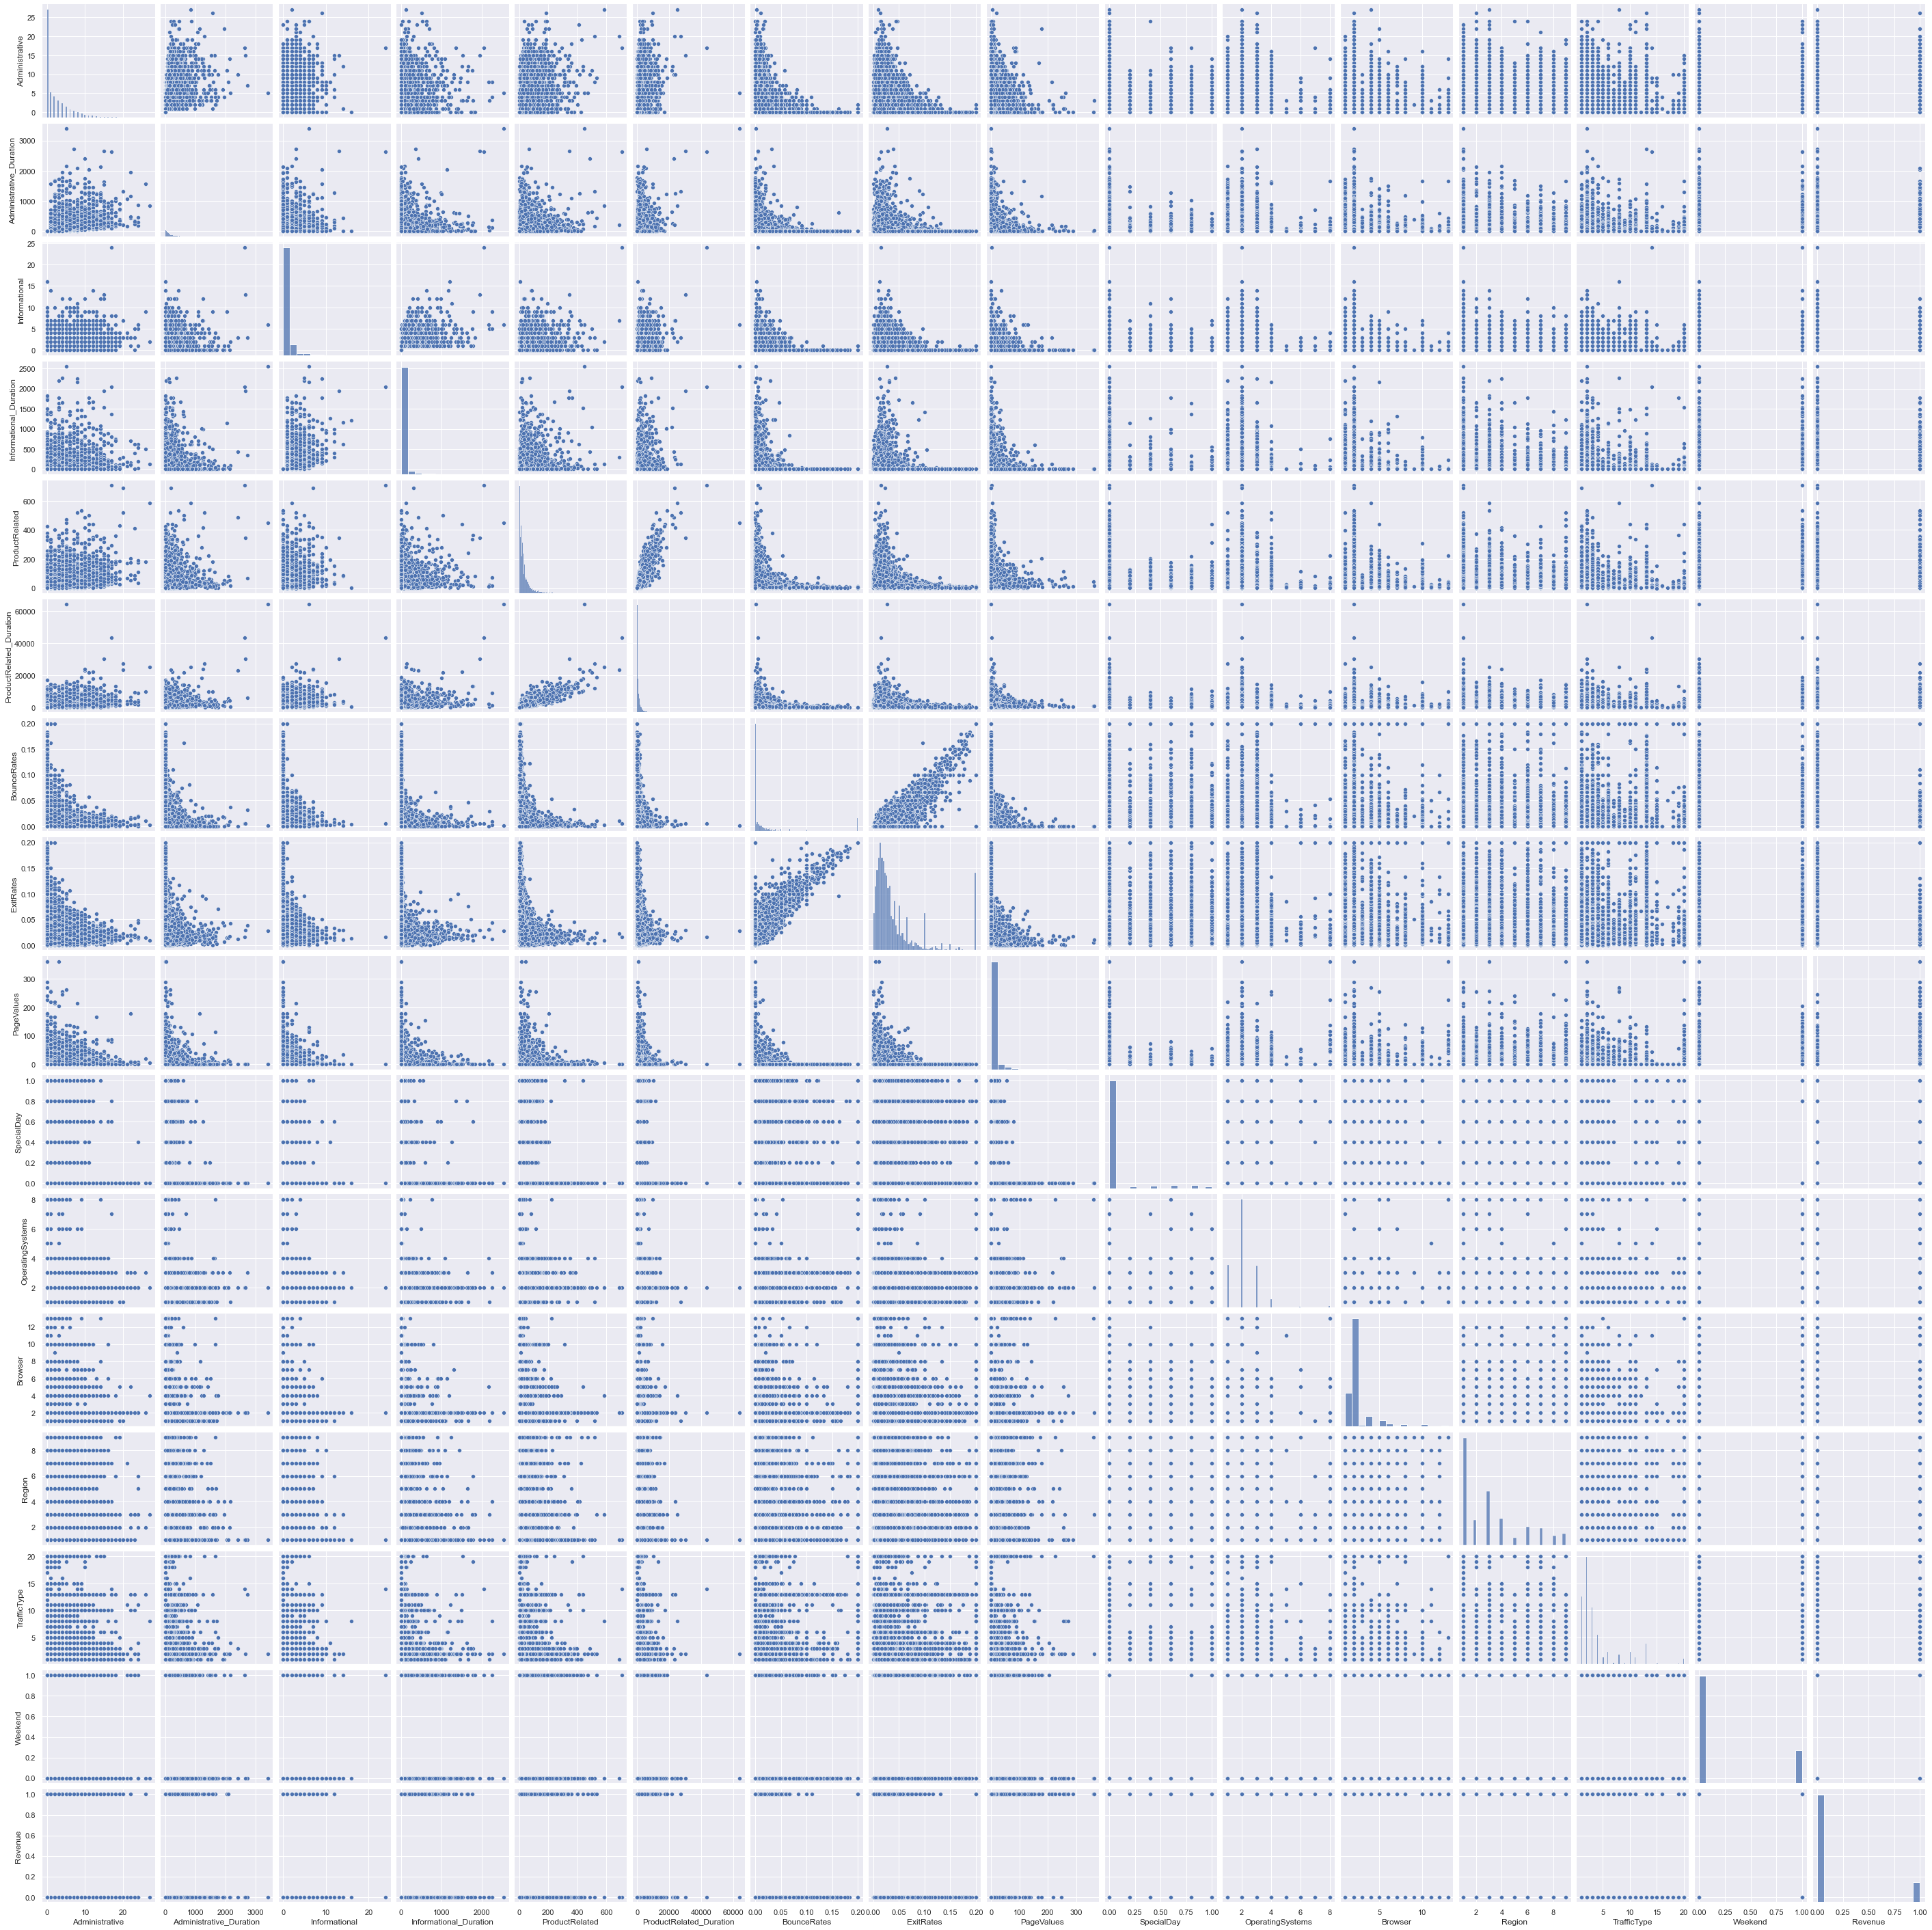

In [2089]:
#Looking for basic relationships
sns.pairplot(df);

In [2090]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10385,7,154.000000,3,248.166667,34,886.479167,0.000000,0.005128,77.801588,0.0,Dec,2,2,1,2,New_Visitor,False
8823,0,0.000000,0,0.000000,4,53.625000,0.000000,0.050000,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,False
5298,0,0.000000,0,0.000000,2,121.000000,0.000000,0.050000,0.000000,0.0,May,3,2,1,3,Returning_Visitor,False
10187,0,0.000000,2,21.000000,17,190.708333,0.022222,0.039259,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
11018,0,0.000000,0,0.000000,11,146.500000,0.018182,0.018182,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.000000,25,732.344872,0.000000,0.015676,0.000000,0.0,Nov,3,2,1,2,Returning_Visitor,False
5191,0,0.000000,0,0.000000,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True
5390,0,0.000000,0,0.000000,3,189.000000,0.000000,0.066667,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
860,0,0.000000,0,0.000000,13,305.000000,0.000000,0.016667,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False


# Pipeline Part 2: Cross Validate Function

In [2091]:
#Creating a way to determine cross_validate models, print a summary, and plot results

class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y

        
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''Classification Report Results for `{self.name}` model:
            
        ''')
        print(classification_report(self.y, self.model.fit(self.X, self.y).predict(self.X)))

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax
    
    

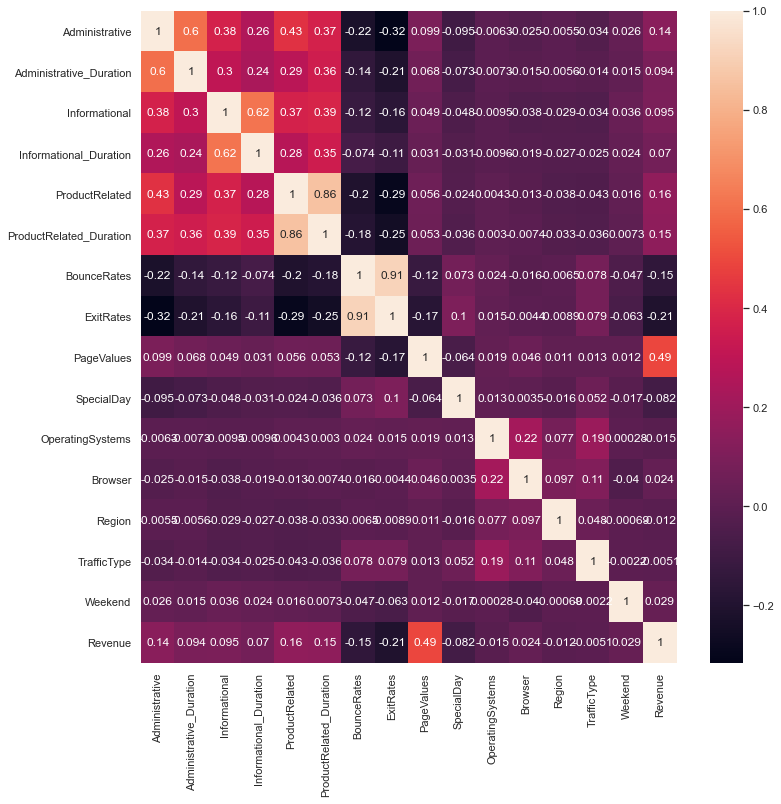

In [2092]:
sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(df.corr(), annot=True);

# Model 1: Dummy Classifier

In [2093]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [2094]:
dummy_clf_pipe = Pipeline(steps=[('ct', CT),
                            ('dummyclass', DummyClassifier(random_state=42))])

In [2095]:
dummy_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2096]:
dummy_pipe = ModelWithCV(dummy_clf_pipe, model_name='dummyclass', X=X_train, y=y_train)

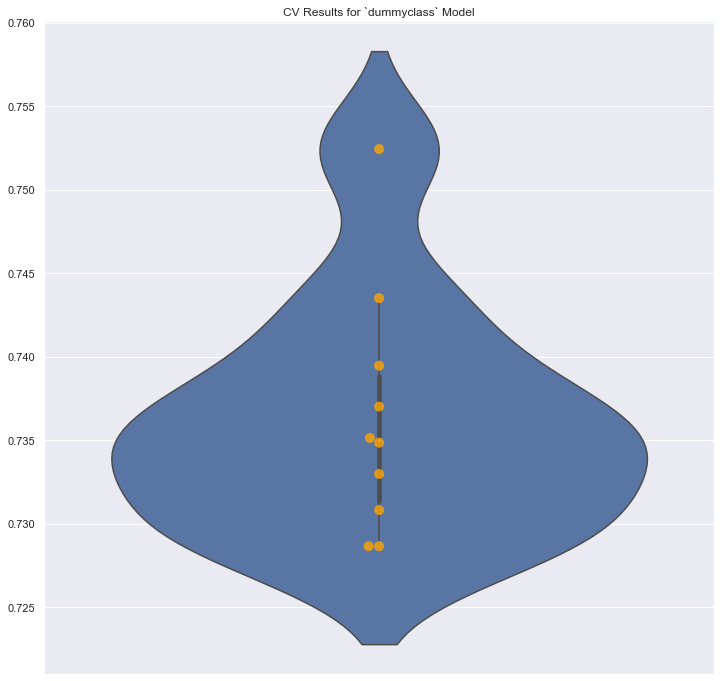

In [2097]:
fig, ax = plt.subplots()

dummy_pipe.plot_cv(ax=ax);
plt.savefig('Dummy_Pipe_graph', dpi=300, bbox_inches='tight')

In [2098]:
dummy_clf_pipe.score(X_train, y_train)

0.7447820914891317

In [2099]:
cross_val_score(dummy_clf_pipe, X_train, y_train, cv=5).mean()

0.7340756873693597

# Model 1: Confusion Matrix / Classification Report

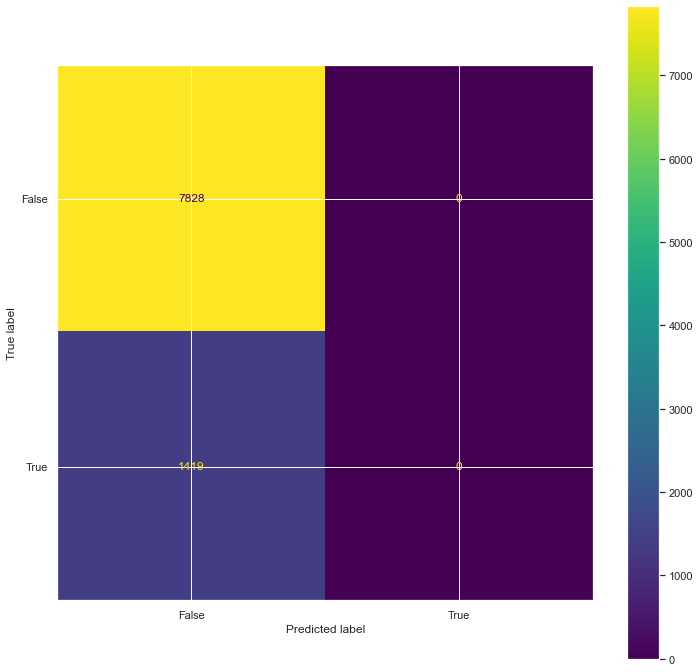

In [2100]:
plot_confusion_matrix(dummy_clf, X_train, y_train);

In [2101]:
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      2594
        True       0.00      0.00      0.00       489

    accuracy                           0.84      3083
   macro avg       0.42      0.50      0.46      3083
weighted avg       0.71      0.84      0.77      3083



## Model 2: Logistic Regression

In [2102]:
#Fitting pipe for a logistic regression
logreg_model_pipe = Pipeline(steps=[('ct', CT),
                            ('logreg', LogisticRegression(random_state=42))])


In [2103]:
logreg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2104]:
log_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)

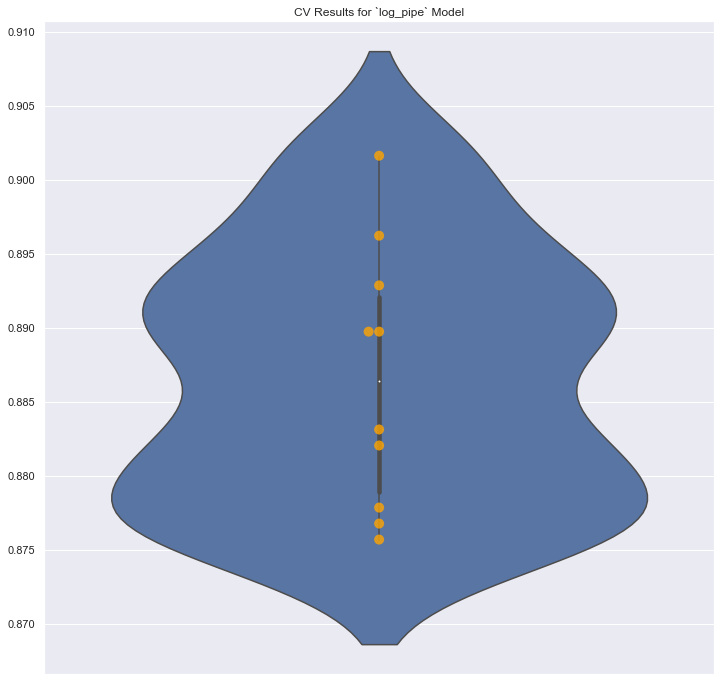

In [2105]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax);

In [2106]:
logreg_model_pipe.score(X_train, y_train)

0.8869903752568401

In [2107]:
cross_val_score(logreg_model_pipe, X_train, y_train, cv=5).mean()

0.885909520120445

# Model 2: Confusion Matrix / Classification Report

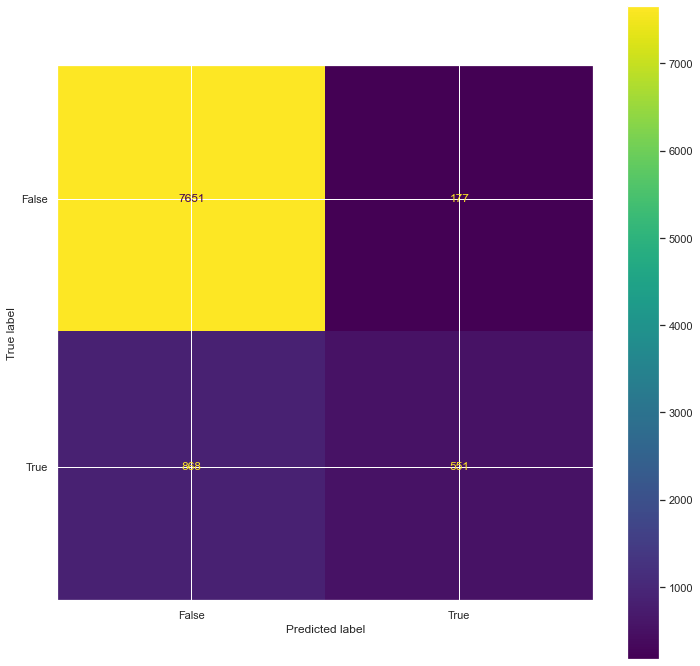

In [2108]:
#Training Data - Only look at testing at final model 
plot_confusion_matrix(logreg_model_pipe, X_train, y_train);

In [2109]:
log_pipe.print_cv_summary()

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      7828
        True       0.76      0.39      0.51      1419

    accuracy                           0.89      9247
   macro avg       0.83      0.68      0.72      9247
weighted avg       0.88      0.89      0.87      9247



# Model 3: KNN

In [2110]:
#Fitting pipeline to Nearest Neighbor's Model
knn_model_pipe = Pipeline([('ct', CT),
                           ('knn_model', KNeighborsClassifier())])

In [2111]:
knn_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2112]:
knn_model = ModelWithCV(model=knn_model_pipe,
                          model_name='knn model',
                          X=X_train,
                          y=y_train)

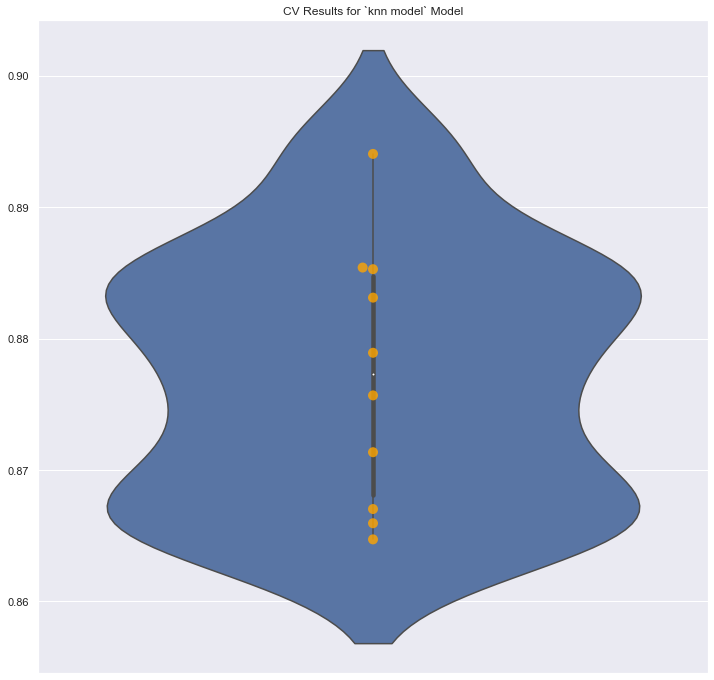

In [2113]:
fig, ax = plt.subplots()

knn_model.plot_cv(ax=ax);

In [2114]:
knn_model_pipe.score(X_train, y_train)

0.9046177138531416

In [2115]:
cross_val_score(knn_model_pipe, X_train, y_train, cv=5).mean()

0.8775817461593556

# Model 3: Confusion Matrix / Classification Report

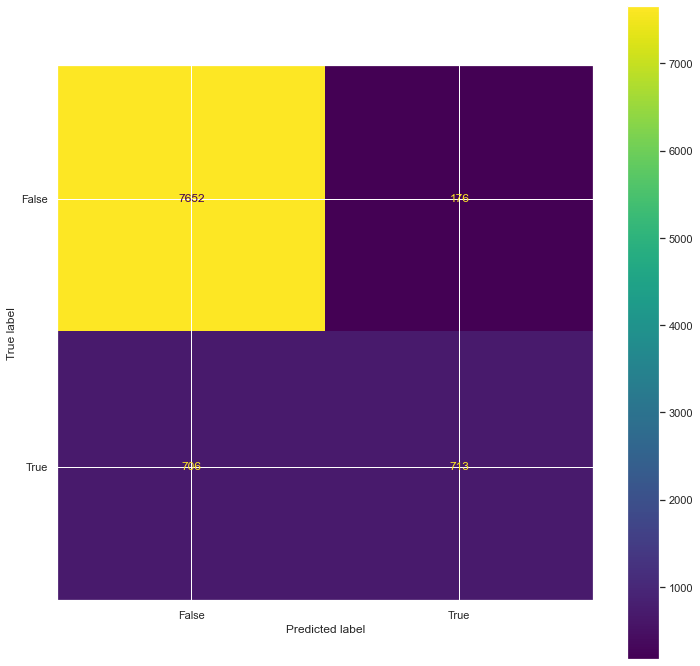

In [2116]:
plot_confusion_matrix(knn_model_pipe, X_train, y_train);

In [2117]:
knn_model.print_cv_summary()

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7828
        True       0.80      0.50      0.62      1419

    accuracy                           0.90      9247
   macro avg       0.86      0.74      0.78      9247
weighted avg       0.90      0.90      0.90      9247



# Model 4: Decision Tree

In [2118]:
#Fitting pipeline to Decision Tree
dt_model_pipe = Pipeline([('ct', CT), 
                          ('dt_model', DecisionTreeClassifier(random_state=42))])

In [2119]:
dt_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2120]:
dt_model = ModelWithCV(model=dt_model_pipe,
                          model_name='dt model',
                          X=X_train,
                          y=y_train)

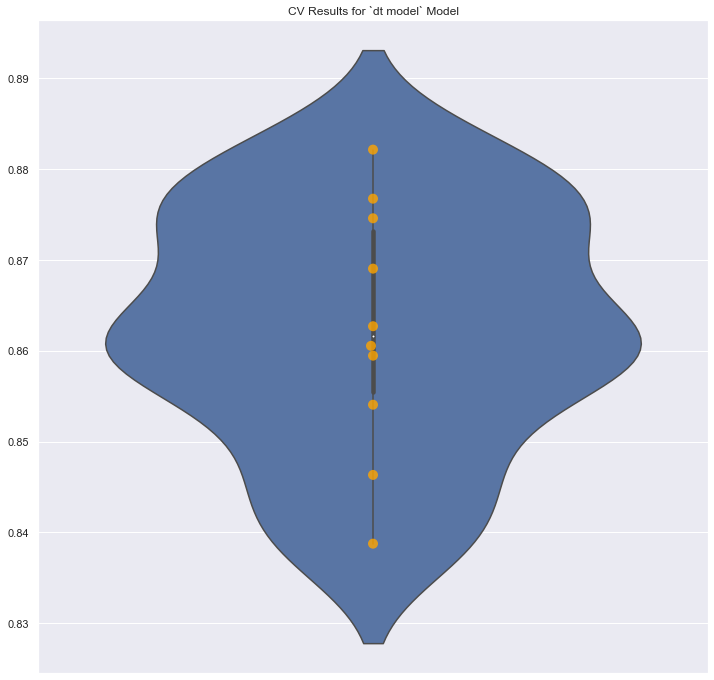

In [2121]:
fig, ax = plt.subplots()

dt_model.plot_cv(ax=ax);

In [2122]:
dt_model_pipe.score(X_train, y_train)
#OVERFIT

1.0

In [2123]:
cross_val_score(dt_model_pipe, X_train, y_train, cv=5).mean()

0.8575739113911098

# Model 4: Confusion Matrix and Classification Report

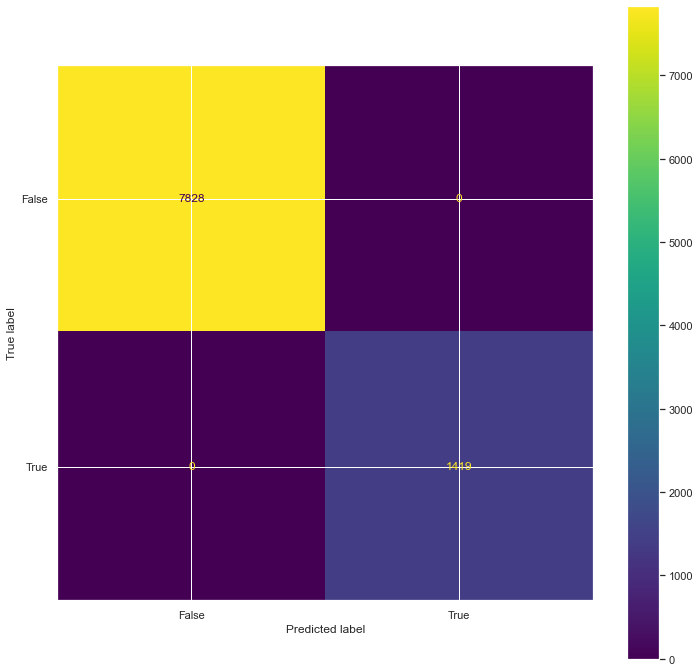

In [2124]:
plot_confusion_matrix(dt_model_pipe, X_train, y_train);

In [2125]:
dt_model.print_cv_summary()

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7828
        True       1.00      1.00      1.00      1419

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247



# Model 5: Random Forest

In [2126]:
rfc_model_pipe = Pipeline(steps=[('ct', CT),
                            ('rfc', RandomForestClassifier(random_state=42))])

In [2127]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2128]:
forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,
                          y=y_train)

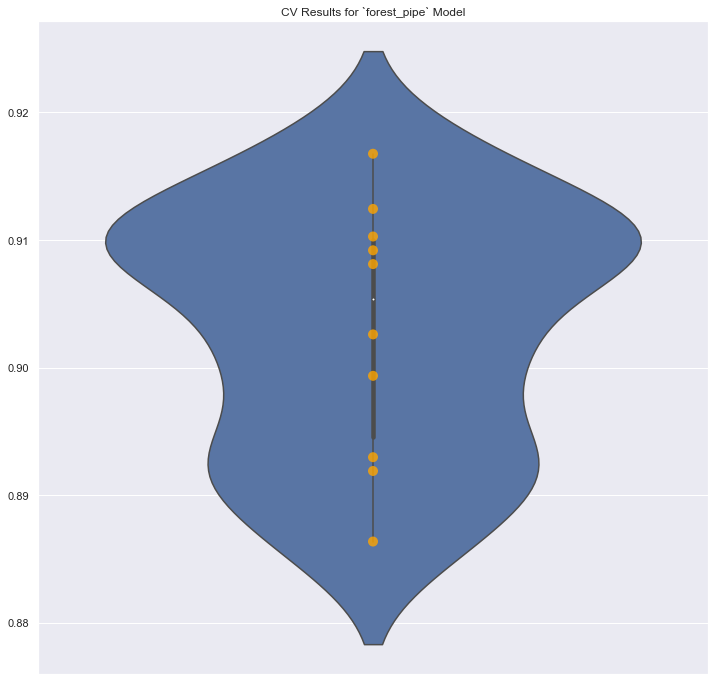

In [2129]:
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

In [2130]:
rfc_model_pipe.score(X_train, y_train)
#OVERFIT

1.0

In [2131]:
cross_val_score(rfc_model_pipe, X_train, y_train, cv=5).mean()

0.9029949278645872

# Model 5: Confusion Matrix / Classification Report

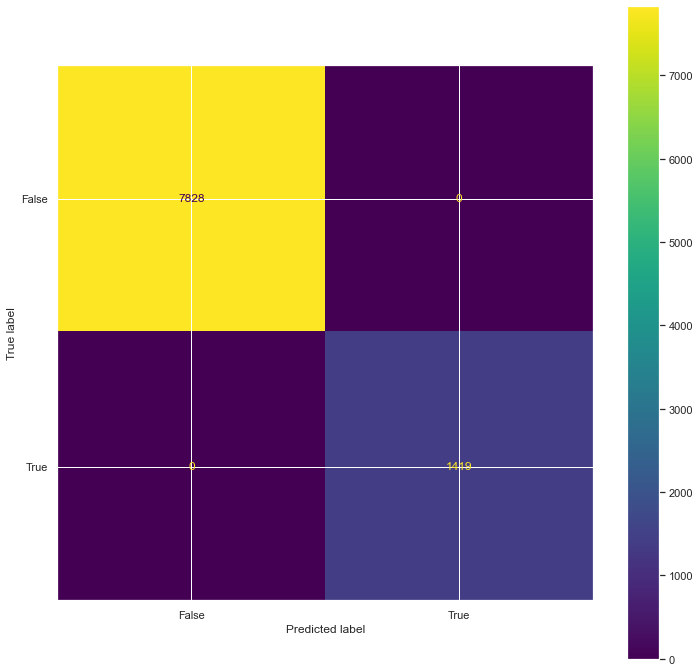

In [2132]:
#On Training not on Test
plot_confusion_matrix(rfc_model_pipe, X_train, y_train);

In [2133]:
forest_pipe.print_cv_summary()

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7828
        True       1.00      1.00      1.00      1419

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247



# Model 6: Gradient Boosting Classifer 

In [2134]:
gbc_model_pipe = Pipeline([('ct', CT), 
                           ('gbc', GradientBoostingClassifier(random_state=42))])

In [2135]:
gbc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2136]:
boost_pipe = ModelWithCV(model=gbc_model_pipe,
                         model_name='boost_pipe',
                         X=X_train,
                         y=y_train)

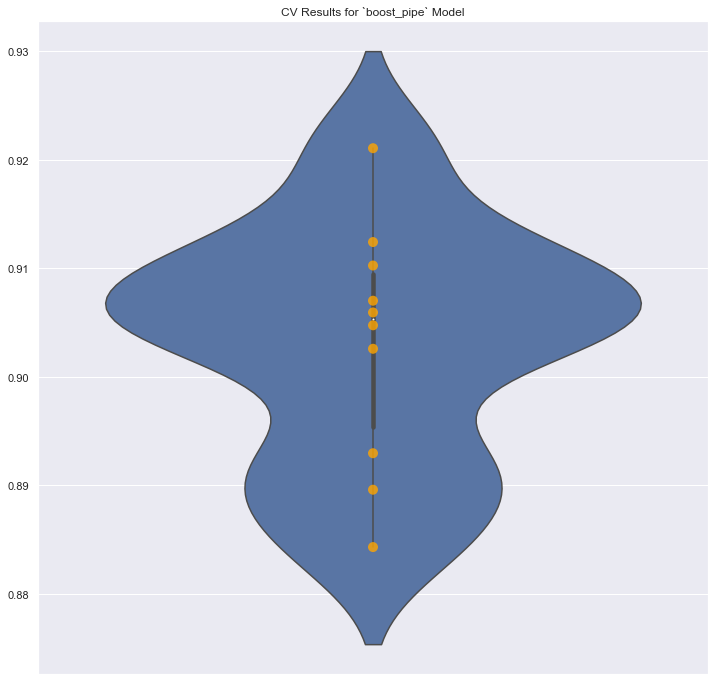

In [2137]:
fig, ax = plt.subplots()

boost_pipe.plot_cv(ax=ax);

In [2138]:
gbc_model_pipe.score(X_train, y_train)

0.9180274683681194

In [2139]:
cross_val_score(gbc_model_pipe, X_train, y_train, cv=5).mean()

0.9039688948006959

# Model 6: Confusion Matrix - Classification Report

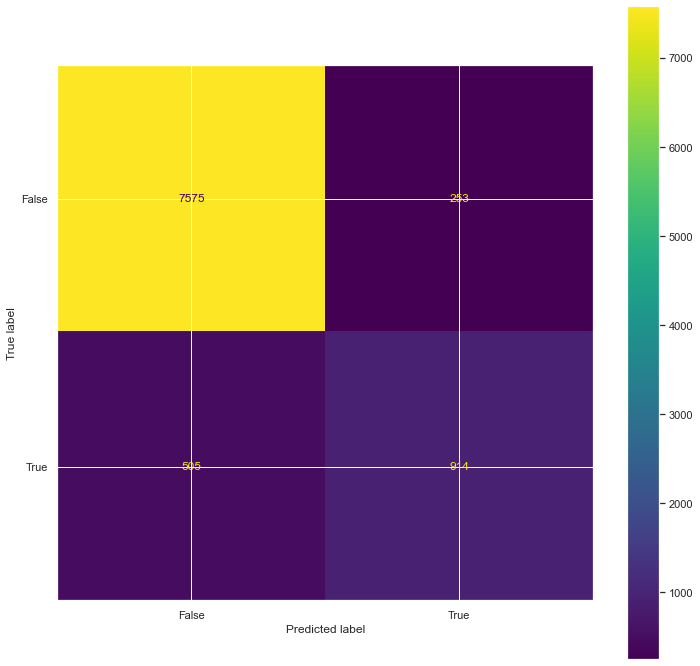

In [2140]:
plot_confusion_matrix(gbc_model_pipe, X_train, y_train);

In [2141]:
boost_pipe.print_cv_summary()

              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7828
        True       0.78      0.64      0.71      1419

    accuracy                           0.92      9247
   macro avg       0.86      0.81      0.83      9247
weighted avg       0.91      0.92      0.91      9247



# Model 7: AdaBoost

In [2142]:
abc_pipe = Pipeline([('ct', CT), ('abc', AdaBoostClassifier(random_state=42))])

In [2143]:
abc_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2144]:
abc = ModelWithCV(model=abc_pipe,
                         model_name='abc_pipe',
                         X=X_train,
                         y=y_train)

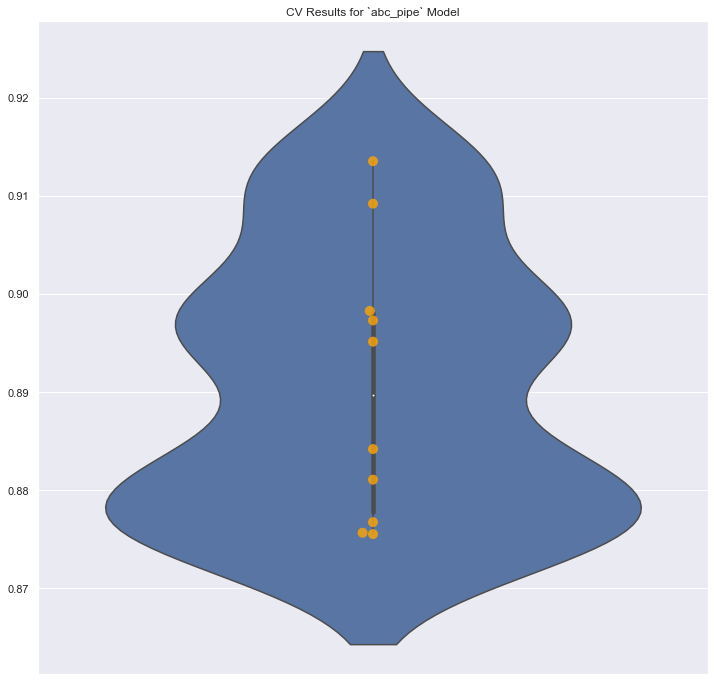

In [2145]:
fig, ax = plt.subplots()

abc.plot_cv(ax=ax);

In [2146]:
abc_pipe.score(X_train, y_train)

0.8957499729642046

In [2147]:
cross_val_score(abc_pipe, X_train, y_train, cv=5).mean()

0.8890461169660737

# Model 7: Confusion Matrix - Classification Report

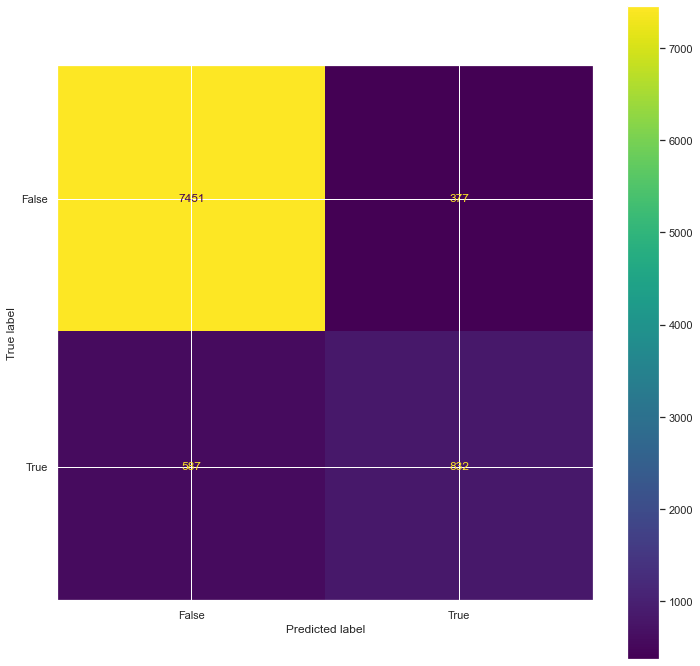

In [2148]:
plot_confusion_matrix(abc_pipe, X_train, y_train);

In [2149]:
print(classification_report(y_test, abc_pipe.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2594
        True       0.67      0.55      0.60       489

    accuracy                           0.88      3083
   macro avg       0.79      0.75      0.77      3083
weighted avg       0.88      0.88      0.88      3083



# Model 8: Gradient Boosting

In [2150]:
gbc = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])


gbc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2151]:
gbc_pipe = ModelWithCV(model=gbc,
                         model_name='gbc_pipe',
                         X=X_train,
                         y=y_train)

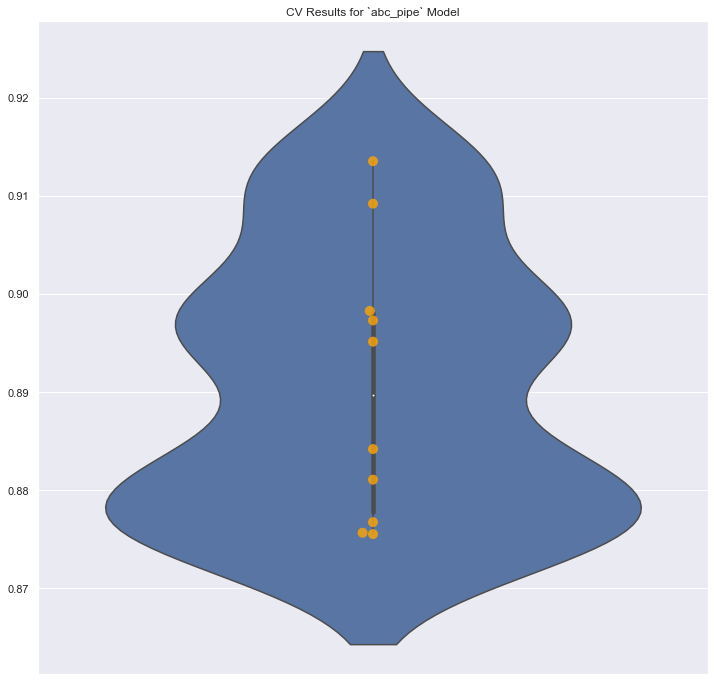

In [2152]:
fig, ax = plt.subplots()

abc.plot_cv(ax=ax);

In [2153]:
gbc.score(X_train, y_train)

0.9180274683681194

In [2154]:
cross_val_score(gbc, X_train, y_train, cv=5).mean()

0.9039688948006959

# Model 8: Confusion Matrix and Classification Report

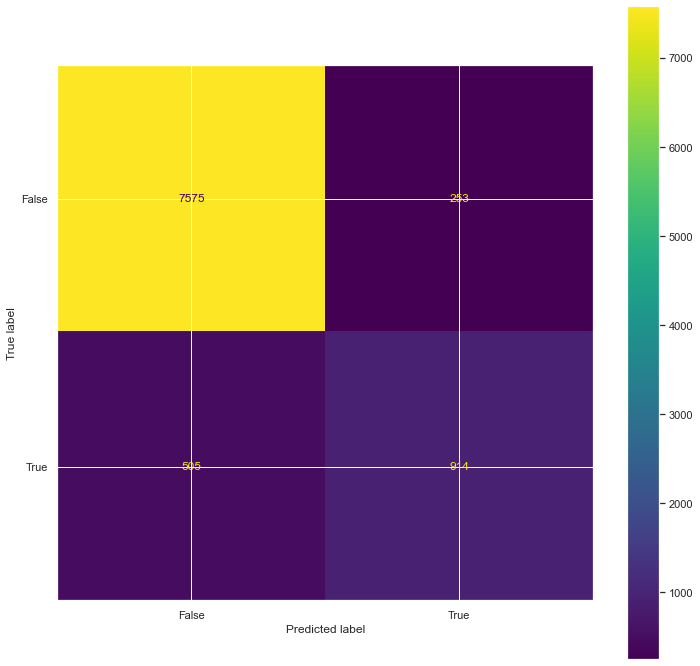

In [2155]:
plot_confusion_matrix(gbc, X_train, y_train);

In [2156]:
print(classification_report(y_test, gbc.predict(X_test)))

#F1 Score 

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2594
        True       0.70      0.62      0.66       489

    accuracy                           0.90      3083
   macro avg       0.82      0.78      0.80      3083
weighted avg       0.89      0.90      0.89      3083



# Model 9: XGBoost 

In [2157]:
grad_boost_class = Pipeline([('ct', CT), ('gbc', xgboost.XGBClassifier(random_state=42, objective='binary:logistic'))])

grad_boost_class.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2158]:
grad = ModelWithCV(model=grad_boost_class,
                         model_name='grad_boost_class',
                         X=X_train,
                         y=y_train)

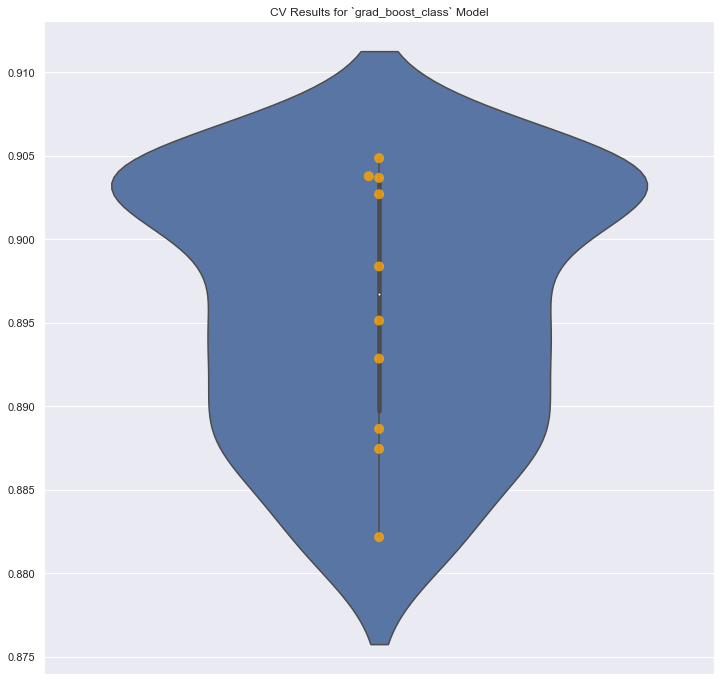

In [2160]:
fig, ax = plt.subplots()

grad.plot_cv(ax=ax);

In [2161]:
#Training Data - Overfit
grad_boost_class.score(X_train, y_train)

0.9797772250459609

In [2162]:
cross_val_score(grad_boost_class, X_train, y_train, cv=5).mean()

0.898237820297312

# Model 9: Confusion Matrix and Classification Report

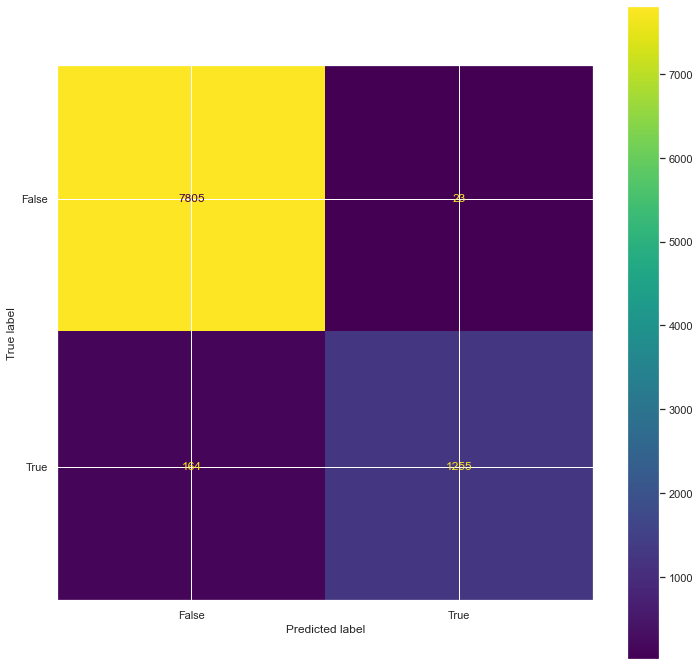

In [2163]:
plot_confusion_matrix(grad_boost_class, X_train, y_train);

In [2164]:
print(classification_report(y_test, grad_boost_class.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2594
        True       0.68      0.55      0.61       489

    accuracy                           0.89      3083
   macro avg       0.80      0.75      0.77      3083
weighted avg       0.88      0.89      0.88      3083



# Grid Search 1

In [2165]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__min_samples_leaf'] = [1, 5, 10]
params['rfc__max_depth'] = [5, 10, 15]
params

{'rfc__criterion': ['gini', 'entropy'],
 'rfc__min_samples_leaf': [1, 5, 10],
 'rfc__max_depth': [5, 10, 15]}

In [2166]:
RFC_tuned1 = GridSearchCV(estimator=rfc_model_pipe,
                 param_grid=params,
                 cv=10, verbose=3, n_jobs=-3)

In [2167]:
RFC_tuned1.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  24 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-3)]: Done 120 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   44.6s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('DropAdmin',
                                                                         FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                                         ['Administrative',
                                                                          'Administrative_Duration']),
                                                                        ('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                              

In [2168]:
RFC_tuned1.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 15,
 'rfc__min_samples_leaf': 10}

In [2169]:
RFC_tuned1.best_score_

0.9068870948870948

# Grid Search 2

In [2170]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__min_samples_leaf'] = [1, 5, 10]
params['rfc__max_depth'] = [5, 10, 15]
params

{'rfc__criterion': ['gini', 'entropy'],
 'rfc__min_samples_leaf': [1, 5, 10],
 'rfc__max_depth': [5, 10, 15]}

In [2171]:
RFC_tuned2 = GridSearchCV(estimator=rfc_model_pipe,
                 param_grid=params,
                 cv=5, verbose=3, n_jobs=-5)

In [2172]:
RFC_tuned2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   33.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('DropAdmin',
                                                                         FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                                         ['Administrative',
                                                                          'Administrative_Duration']),
                                                                        ('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                               

In [2173]:
RFC_tuned2.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 10,
 'rfc__min_samples_leaf': 10}

In [2174]:
RFC_tuned2.best_score_

0.905807317322731

# Grid Search 3

In [2175]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__min_samples_leaf'] = [10, 15, 20]
params['rfc__max_depth'] = [5, 10, 15]
params

{'rfc__criterion': ['gini', 'entropy'],
 'rfc__min_samples_leaf': [10, 15, 20],
 'rfc__max_depth': [5, 10, 15]}

In [2176]:
RFC_tuned3 = GridSearchCV(estimator=rfc_model_pipe,
                 param_grid=params,
                 cv=5, verbose=3, n_jobs=-5)

RFC_tuned3.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   30.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('DropAdmin',
                                                                         FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                                         ['Administrative',
                                                                          'Administrative_Duration']),
                                                                        ('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                               

In [2177]:
RFC_tuned3.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 10,
 'rfc__min_samples_leaf': 20}

In [2178]:
RFC_tuned3.best_score_

0.9063483840790493

# Best Model: Random Forest Model

In [2179]:
Final_model_RFC = RFC_tuned3.best_estimator_
Final_model_RFC

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('DropAdmin',
                                                  FunctionTransformer(func=<function drop_colum at 0x0000022036F91F70>),
                                                  ['Administrative',
                                                   'Administrative_Duration']),
                                                 ('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                               

In [2180]:
forest_pipe3 = ModelWithCV(model=RFC_tuned3,
                          model_name='forest_pipe3',
                          X=X_train,
                          y=y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   31.5s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   28.2s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   29.5s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   36.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   31.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   30.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   28.2s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   29.1s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   32.9s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   30.8s finished


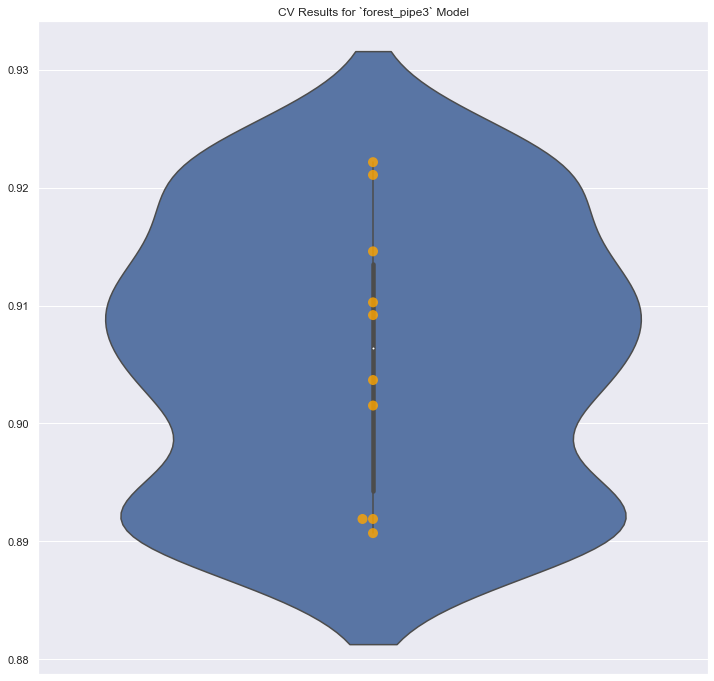

In [2181]:
fig, ax = plt.subplots()

forest_pipe3.plot_cv(ax=ax);
plt.savefig('Forest Pipe Final', dpi=300, bbox_inches='tight')

In [2182]:
RFC_tuned3.score(X_train, y_train)

0.9170541797339677

In [2183]:
cross_val_score(RFC_tuned3, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   25.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   26.1s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   25.5s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   25.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   25.2s finished


0.9056990922777836

In [2184]:
cross_val_score(RFC_tuned3, X_test, y_test, cv=5).mean()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   12.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   12.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   12.5s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   12.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-5)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-5)]: Done  90 out of  90 | elapsed:   12.5s finished


0.8949130691026964

# Final Model: Confusion Matrix and Classification Report

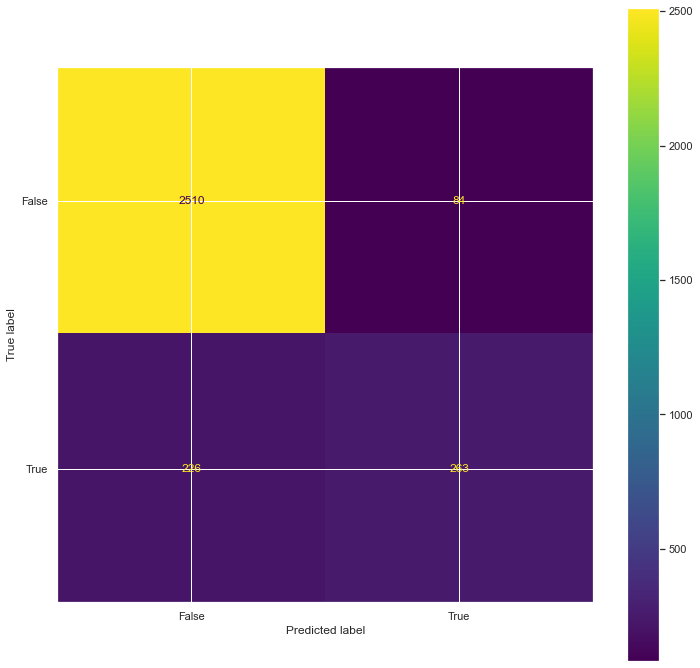

In [2185]:
plot_confusion_matrix(RFC_tuned2, X_test, y_test);

In [2186]:
print(classification_report(y_test, RFC_tuned3.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2594
        True       0.75      0.54      0.63       489

    accuracy                           0.90      3083
   macro avg       0.84      0.75      0.78      3083
weighted avg       0.89      0.90      0.89      3083

